In [2]:
# Check user 
!echo $USER

sakoki


In [3]:
# List all paths 
import sys
sys.path

['',
 '/home/sakoki/.conda/envs/rushhour/lib/python3.6/site-packages',
 '/home/sakoki/.conda/envs/rushhour/lib/python36.zip',
 '/home/sakoki/.conda/envs/rushhour/lib/python3.6',
 '/home/sakoki/.conda/envs/rushhour/lib/python3.6/lib-dynload',
 '/home/sakoki/.conda/envs/rushhour/lib/python3.6/site-packages/IPython/extensions',
 '/home/sakoki/.ipython']

In [4]:
import geopandas as gpd
import pandas as pd
import numpy as np 
import json
import pprint
import os 
import csv
import re
from time import time
from shapely.geometry import Polygon
from shapely.geometry import Point

In [5]:
tweet_path = '/scratch/si699w19_fluxg/zhuofeng/SanFrancisco/'
files = os.listdir(tweet_path)
for i, fname in enumerate(files):
    print(i, fname)

0 SanFrancisco.2016-02-17
1 SanFrancisco.2016-02-23
2 SanFrancisco.2016-02-16
3 SanFrancisco.2016-02-08
4 SanFrancisco.2016-02-18
5 SanFrancisco.2016-02-29
6 SanFrancisco.2016-02-15
7 SanFrancisco.2016-02-24
8 SanFrancisco.2016-02-26
9 SanFrancisco.2016-02-11
10 SanFrancisco.2016-02-04
11 SanFrancisco.2016-02-09
12 SanFrancisco.2016-02-06
13 SanFrancisco.2016-02-28
14 SanFrancisco.2016-02-25
15 SanFrancisco.2016-02-19
16 SanFrancisco.2016-02-12
17 SanFrancisco.2016-02-22
18 SanFrancisco.2016-02-10
19 SanFrancisco.2016-02-07
20 SanFrancisco.2016-02-05
21 SanFrancisco.2016-02-01
22 SanFrancisco.2016-02-13
23 SanFrancisco.2016-02-20
24 SanFrancisco.2016-02-02
25 SanFrancisco.2016-02-21
26 SanFrancisco.2016-02-03
27 SanFrancisco.2016-02-27
28 SanFrancisco.2016-02-14


## GIS filter development


In [6]:
os.listdir('./data')

['tweet_2016_02_02.csv',
 'tweet_2016_02_01.csv',
 'tweet_2016_02_26.csv',
 'tweet_2016_02_27.csv',
 'tweet_2016_02_06.csv',
 'tweet_2016_02_12.csv',
 'tweet_2016_02_09.csv',
 'tweet_2016_02_08.csv',
 'tweet_2016_02_28.csv',
 'sf_all_census_zones.cpg',
 'sf_all_census_zones.dbf',
 'sf_all_census_zones.shp',
 'tweet_2016_02_23.csv',
 'tweet_2016_02_07.csv',
 'tweet_2016_02_22.csv',
 'tweet_2016_02_24.csv',
 'tweet_2016_02_29.csv',
 'tweet_2016_02_17.csv',
 'tweet_2016_02_16.csv',
 'tweet_2016_02_03.csv',
 'tweet_2016_02_11.csv',
 'tweet_2016_02_19.csv',
 'tweet_2016_02_18.csv',
 'tweet_2016_02_15.csv',
 'tweet_2016_02_05.csv',
 'tweet_2016_02_25.csv',
 'tweet_2016_02_14.csv',
 'tweet_2016_02_21.csv',
 'sf_all_census_zones.shx',
 'tweet_2016_02_10.csv',
 'tweet_2016_02_20.csv',
 'tweet_2016_02_13.csv',
 'tweet_2016_02_04.csv']

Test

In [7]:
p1 = Polygon([(0,0), (1,1), (1,0)])
p2 = Polygon([(0,1), (1,0), (1,1)])
print(p1.intersects(p2))
print(not p1.disjoint(p2))

True
True


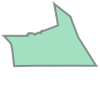

In [8]:
# Read entire SF city GIS Polygon
sf_polygon = gpd.read_file("./data/sf_all_census_zones.shp")
sf_polygon = sf_polygon['geometry'][0]
sf_polygon

In [9]:
sf_polygon.contains(p1)

False

In [10]:
c = [[[-74.026675,40.683935],
      [-74.026675,40.877483],
      [-73.910408,40.877483],
      [-73.910408,40.683935]]]

c

[[[-74.026675, 40.683935],
  [-74.026675, 40.877483],
  [-73.910408, 40.877483],
  [-73.910408, 40.683935]]]

In [11]:
coord = [Point(i) for i in c[0]]

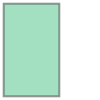

In [12]:
test = Polygon([[p.x, p.y] for p in coord])
test

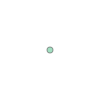

In [13]:
test.centroid

## File Naming 

In [14]:
# Regex to capture data for filename 
p = re.compile(r"\d{4}-\d{2}-\d{2}")

In [15]:
def file_name(fname, regex):
    """Generate date to add to the end of file name
    
    :param str fname: string to match
    :param regex: compiled regular expression
    :type regex: _sre.SRE_Pattern 
    :return: matched and formatted string 
    """
    
    match = regex.search(fname).group()
    return re.sub('-', '_', match)

# Twitter Data Filtering

In [ ]:
# Read entire SF city GIS Polygon
sf_polygon = gpd.read_file("./data/sf_all_census_zones.shp")
sf_polygon = sf_polygon['geometry'][0]
sf_polygon

The place object is always present when a Tweet is geo-tagged, while the coordinates object is only present (non-null) when the Tweet is assigned an exact location. If an exact location is provided, the coordinates object will provide a [long, lat] array with the geographical coordinates, and a Twitter Place that corresponds to that location will be assigned.  
** Twitter Docs


In mapping frameworks, spatial coordiates are often in order of latitude and longitude. In spatial databases spatial coordinates are in x = longitude, and y = latitude. 

## Developing the filtering script

In [19]:
with open(tweet_path + files[1], 'r', encoding='UTF-8') as infile:
    with open('tweet_test.csv', 'w')as outfile:
        tweet_writer = csv.writer(outfile)

        tweet_writer.writerow(['lon', 'lat', 'time', 'time_stamp', 'text',
                              'hashtags', 'urls', 'user_mentions',
                              'favorite_count', 'retweet_count',
                              'user_followers_count', 'user_friends_count',
                              'user_statuses_count'])
        
        # Number of tweets per file 
        count = 0 
        # Number of tweets corresponding to SF
        valid = 0 
#         for idx, line in enumerate(infile):
        for line in infile: 
#             if count < 100: 
            count += 1 
            tweets = json.loads(line)

            # # Keep all tweets written in english
            # if 'lang' in tweets and tweets['lang'] == 'en':

            # Find the lon/lat coordinates
            coordinates = ''

            # Check if exact location was assigned 
            if tweets['coordinates'] != None:
                point = Point(tweets['coordinates']['coordinates'])
                if sf_polygon.contains(point):
                    coordinates = point
#                         print("{} Exact location found".format(count))
#                         print(coordinates)
                else: 
                    continue
            
            # Check if geo was provided
            elif tweets['geo'] != None:
                # Deprecated attribute has coordinates formatted as [lat, lon]
                point = Point(np.flip(tweets['geo']['coordinates']))
                if sf_polygon.contains(point):
                    coordinates = point
                    print('Geo found!')
                else:
                    continue

            # Check if tweet is geo-tagged 
            elif tweets['place'] != None: 
                # if tweets['place']['full_name'] == 'San Fransisco, CA':                        
                if tweets['place']['bounding_box'] != None:
                    coord = tweets['place']['bounding_box']['coordinates'] 
                    points = [Point(i) for i in coord[0]]
                    polygon = Polygon([[p.x, p.y] for p in points])
                    if not sf_polygon.disjoint(polygon):
                        # Get center point of Polygon
                        coordinates = polygon.centroid
#                             print("{} Geotag found!".format(count))
#                             print(coordinates)
                    else:
                        continue

            time = tweets['created_at']                                  # Time of creation
            time_stamp = tweets['timestamp_ms']                          # Time of creation
            text = tweets['text']                                        # Content
            num_hashtag = len(tweets['entities']['hashtags'])            # Concepts 
            urls = len(tweets['entities']['urls'])                       # Linked resource
            user_mentions = len(tweets['entities']['user_mentions'])     # Friend tagging 
            favorite_count = tweets['favorite_count']                    # Influence factor
            retweet_count = tweets['retweet_count']                      # Influence spread 
            # user_favourites_count = tweets['user']['favourites_count']
            user_followers_count = tweets['user']['followers_count']     # Popularity
            user_friends_count = tweets['user']['friends_count']         # Connectedness 
            user_statuses_count = tweets['user']['statuses_count']       # Activity
            
            try:
                tweet_writer.writerow([coordinates.x, coordinates.y, time, time_stamp, text, num_hashtag,
                                      urls, user_mentions, favorite_count, retweet_count, 
                                      user_followers_count, user_friends_count,
                                      user_statuses_count])
                valid += 1 
            except:
                pass
                
        print("Number of valid tweets: {}".format(valid))
        print("Number of total tweets: {}".format(count))

Number of valid tweets: 3568
Number of total tweets: 729358


## Run function on all files

In [20]:
start_time = time.perf_counter()

for fname in files:
    with open(tweet_path + fname, 'r', encoding='UTF-8') as infile:
        with open("tweet_{}.csv".format(file_name(fname, p)), 'w') as outfile:
            tweet_writer = csv.writer(outfile)

            tweet_writer.writerow(['lon', 'lat', 'time', 'time_stamp', 'text',
                                  'hashtags', 'urls', 'user_mentions',
                                  'favorite_count', 'retweet_count',
                                  'user_followers_count', 'user_friends_count',
                                  'user_statuses_count'])

            # Number of tweets per file 
            count = 0 
            # Number of tweets corresponding to SF
            valid = 0 
            for line in infile: 
                # if count < 100: 
                count += 1 
                tweets = json.loads(line)

                # # Keep all tweets written in english
                # if 'lang' in tweets and tweets['lang'] == 'en':

                # Find the lon/lat coordinates
                coordinates = ''

                # Check if exact location was assigned 
                if tweets['coordinates'] != None:
                    point = Point(tweets['coordinates']['coordinates'])
                    if sf_polygon.contains(point):
                        coordinates = point
                        # print("{} Exact location found".format(count))
                        # print(coordinates)
                    else: 
                        continue
                
                # Check if deprecated geo field was provided
                elif tweets['geo'] != None:
                    # Deprecated attribute has coordinates formatted as [lat, lon]
                    # Flip to [lon, lat]
                    point = Point(np.flip(tweets['geo']['coordinates']))
                    if sf_polygon.contains(point):
                        coordinates = point
                    else:
                        continue

                # Check if tweet is geo-tagged 
                elif tweets['place'] != None: 
                    # if tweets['place']['full_name'] == 'San Fransisco, CA':                        
                    if tweets['place']['bounding_box'] != None:
                        coord = tweets['place']['bounding_box']['coordinates'] 
                        points = [Point(i) for i in coord[0]]
                        polygon = Polygon([[p.x, p.y] for p in points])
                        if not sf_polygon.disjoint(polygon):
                            # Get center point of Polygon
                            coordinates = polygon.centroid
                            # print("{} Geotag found!".format(count))
                            # print(coordinates)
                        else:
                            continue

                time = tweets['created_at']                                  # Time of creation
                time_stamp = tweets['timestamp_ms']                          # Time of creation
                text = tweets['text']                                        # Content
                num_hashtag = len(tweets['entities']['hashtags'])            # Concepts 
                urls = len(tweets['entities']['urls'])                       # Linked resource
                user_mentions = len(tweets['entities']['user_mentions'])     # Friend tagging 
                favorite_count = tweets['favorite_count']                    # Influence factor
                retweet_count = tweets['retweet_count']                      # Influence spread 
                # user_favourites_count = tweets['user']['favourites_count']
                user_followers_count = tweets['user']['followers_count']     # Popularity
                user_friends_count = tweets['user']['friends_count']         # Connectedness 
                user_statuses_count = tweets['user']['statuses_count']       # Activity

                try:
                    tweet_writer.writerow([coordinates.x, coordinates.y, time, time_stamp, text, num_hashtag,
                                          urls, user_mentions, favorite_count, retweet_count, 
                                          user_followers_count, user_friends_count,
                                          user_statuses_count])
                    valid += 1 
                except:
                    pass

            print('Finished: {}'.format(fname))
            print("Number of valid tweets: {}".format(valid))
            print("Number of total tweets: {}".format(count))
            
end_time = time.perf_counter()
run_time = end_time - start_time
print('Finished in {:.4f}s'.format(run_time))

Finished: SanFrancisco.2016-02-17
Number of valid tweets: 3731
Number of total tweets: 735709
Finished: SanFrancisco.2016-02-23
Number of valid tweets: 3568
Number of total tweets: 729358
Finished: SanFrancisco.2016-02-16
Number of valid tweets: 3595
Number of total tweets: 727710
Finished: SanFrancisco.2016-02-08
Number of valid tweets: 3991
Number of total tweets: 743074
Finished: SanFrancisco.2016-02-18
Number of valid tweets: 4032
Number of total tweets: 745560
Finished: SanFrancisco.2016-02-29
Number of valid tweets: 3734
Number of total tweets: 734924
Finished: SanFrancisco.2016-02-15
Number of valid tweets: 3717
Number of total tweets: 754446
Finished: SanFrancisco.2016-02-24
Number of valid tweets: 3728
Number of total tweets: 744509
Finished: SanFrancisco.2016-02-26
Number of valid tweets: 3896
Number of total tweets: 733845
Finished: SanFrancisco.2016-02-11
Number of valid tweets: 3791
Number of total tweets: 772900
Finished: SanFrancisco.2016-02-04
Number of valid tweets: 42

AttributeError: 'str' object has no attribute 'perf_counter'

Total number of tweets in dataset: 21900028  
Total number of tweets retained: 111408  
(21900028 / 111408) * 100 = 0.5113! 